In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, VGG19, Xception, InceptionV3, EfficientNetB7, EfficientNetV2S, MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np

2024-08-31 18:27:20.049768: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-31 18:27:20.244540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 18:27:20.335672: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 18:27:20.366905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-31 18:27:20.519811: I tensorflow/core/platform/cpu_feature_guar

In [2]:
data_dir = "data"
train_path= 'train/'
val_path= 'val/'
test_path= 'test/'
channels = 3
batch_size = 32

In [3]:
input_shape = (227,227)
batch_size = 32
train_generator = ImageDataGenerator(
    horizontal_flip = True, 
#     rotation_range=30, 
#     zoom_range=0.2,
    rescale=1/255,
    fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    rescale=1/255,
    fill_mode='nearest'
)

train_image_generator = train_generator.flow_from_directory(
    train_path,
    target_size=input_shape,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

test_image_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

Found 2520 images belonging to 6 classes.
Found 540 images belonging to 6 classes.


In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint
base_model_0 = MobileNetV2(
    input_shape=(227, 227, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 

for layer in base_model_0.layers:
    layer.trainable = False

# Build model
inputs = base_model_0.input
x = BatchNormalization()(base_model_0.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(6, activation='softmax')(x)
model_0 = Model(inputs=inputs, outputs=outputs)

# Compile model
model_0.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint(
    'best_model_MBV2.keras',  
    save_best_only=True,      
    mode='min'                
)
history_0 = model_0.fit(
    train_image_generator,
    epochs=50,
    validation_data=test_image_generator,
    callbacks=[checkpoint_callback]
)
model_0.save('Leather_MBV2.keras')

/tmp/ipykernel_44730/2294285213.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_0 = MobileNetV2(
2024-08-30 11:44:24.099385: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-08-30 11:44:24.099428: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: abhiram-omenbyhpgaminglaptop16wd0xxx
2024-08-30 11:44:24.099432: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: abhiram-omenbyhpgaminglaptop16wd0xxx
2024-08-30 11:44:24.099483: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 560.35.3
2024-08-30 11:44:24.099493: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version 

Epoch 1/50


/home/abhiramd/programs/DL_TF/dl_tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 275ms/step - accuracy: 0.5975 - loss: 1.0000 - val_accuracy: 0.4519 - val_loss: 1.6304
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - accuracy: 0.8126 - loss: 0.4644 - val_accuracy: 0.7241 - val_loss: 0.7267
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.8434 - loss: 0.4024 - val_accuracy: 0.8222 - val_loss: 0.4722
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.8902 - loss: 0.2851 - val_accuracy: 0.8556 - val_loss: 0.4019
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.8892 - loss: 0.2691 - val_accuracy: 0.8722 - val_loss: 0.4262
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - accuracy: 0.8929 - loss: 0.2559 - val_accuracy: 0.8907 - val_loss: 0.3300
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.9207 - loss: 0.2231 - val_accuracy: 0.8778 - val_loss: 0.3540
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 228ms/step - accuracy: 0.9294 - loss: 0.1840 - val_accuracy: 0.861

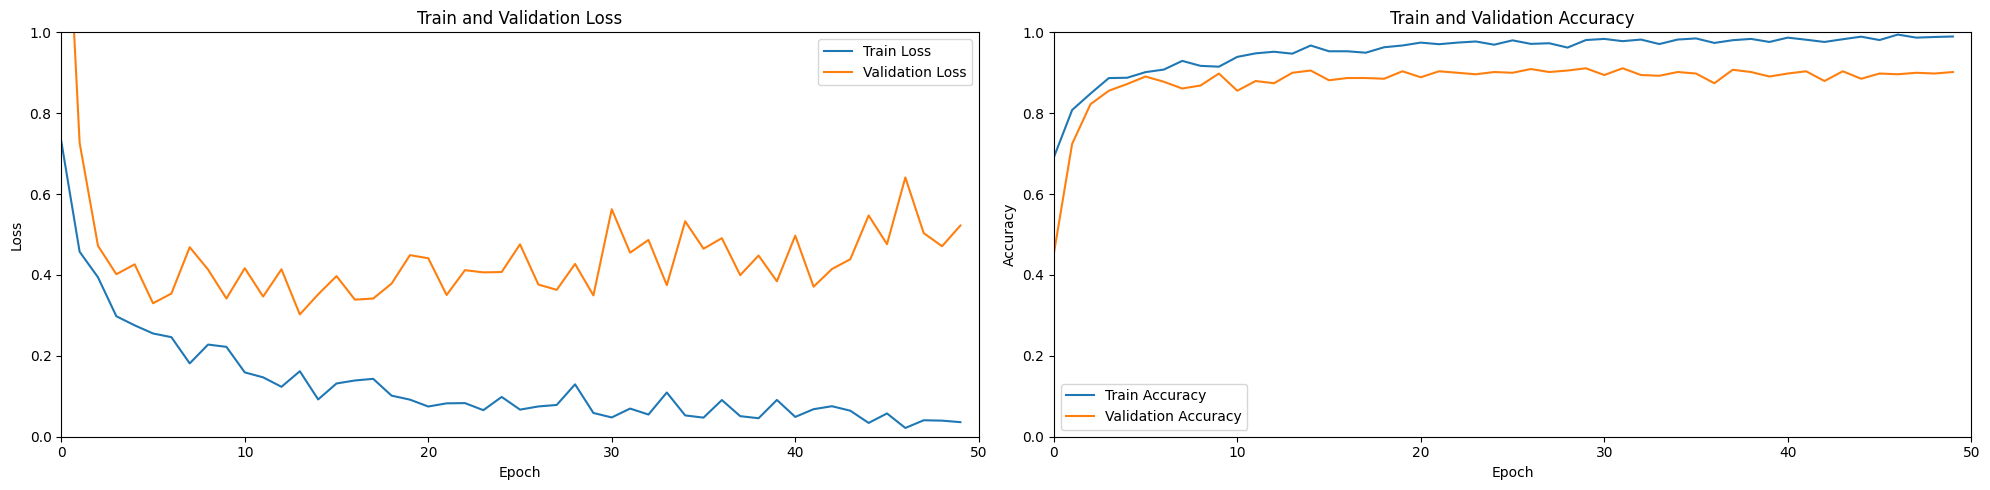

In [6]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history_0.history['loss'],label="Train Loss")
plt.plot(history_0.history['val_loss'], label="Validation Loss")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_0.history['accuracy'], label="Train Accuracy")
plt.plot(history_0.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [7]:
base_model_1 = InceptionV3(
    input_shape=(227, 227, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 

for layer in base_model_1.layers:
    layer.trainable = False

# Build model
inputs = base_model_1.input
x = BatchNormalization()(base_model_1.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(6, activation='softmax')(x)
model_1 = Model(inputs=inputs, outputs=outputs)

# Compile model
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Deal with class imbalances
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_image_generator.classes), y= train_image_generator.classes)
class_weight_dict = dict(enumerate(class_weights))
checkpoint_callback = ModelCheckpoint(
    'best_model_IV3.keras',  
    save_best_only=True,      
    mode='min'                
)
history_1 = model_1.fit(
    train_image_generator,
    epochs=50,
    validation_data=test_image_generator,
    callbacks=[checkpoint_callback],
    class_weight=class_weight_dict
)
model_1.save('Leather_IV3.keras')

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 556ms/step - accuracy: 0.6296 - loss: 1.0214 - val_accuracy: 0.7370 - val_loss: 0.6645
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 544ms/step - accuracy: 0.8210 - loss: 0.4548 - val_accuracy: 0.8204 - val_loss: 0.4640
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 519ms/step - accuracy: 0.8573 - loss: 0.3566 - val_accuracy: 0.8222 - val_loss: 0.5005
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 547ms/step - accuracy: 0.8809 - loss: 0.3062 - val_accuracy: 0.8796 - val_loss: 0.3629
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 545ms/step - accuracy: 0.9285 - loss: 0.2080 - val_accuracy: 0.8667 - val_loss: 0.4452
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 526ms/step - accuracy: 0.9213 - loss: 0.2110 - val_accuracy: 0.8556 - val_loss: 0.5131
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 517ms/step - accuracy: 0.9458 - loss: 0.1699 - val_accuracy: 0.8778 - val_loss: 0.3965
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 529ms/step - accuracy: 0.9416 - loss: 0.1480 - val_accu

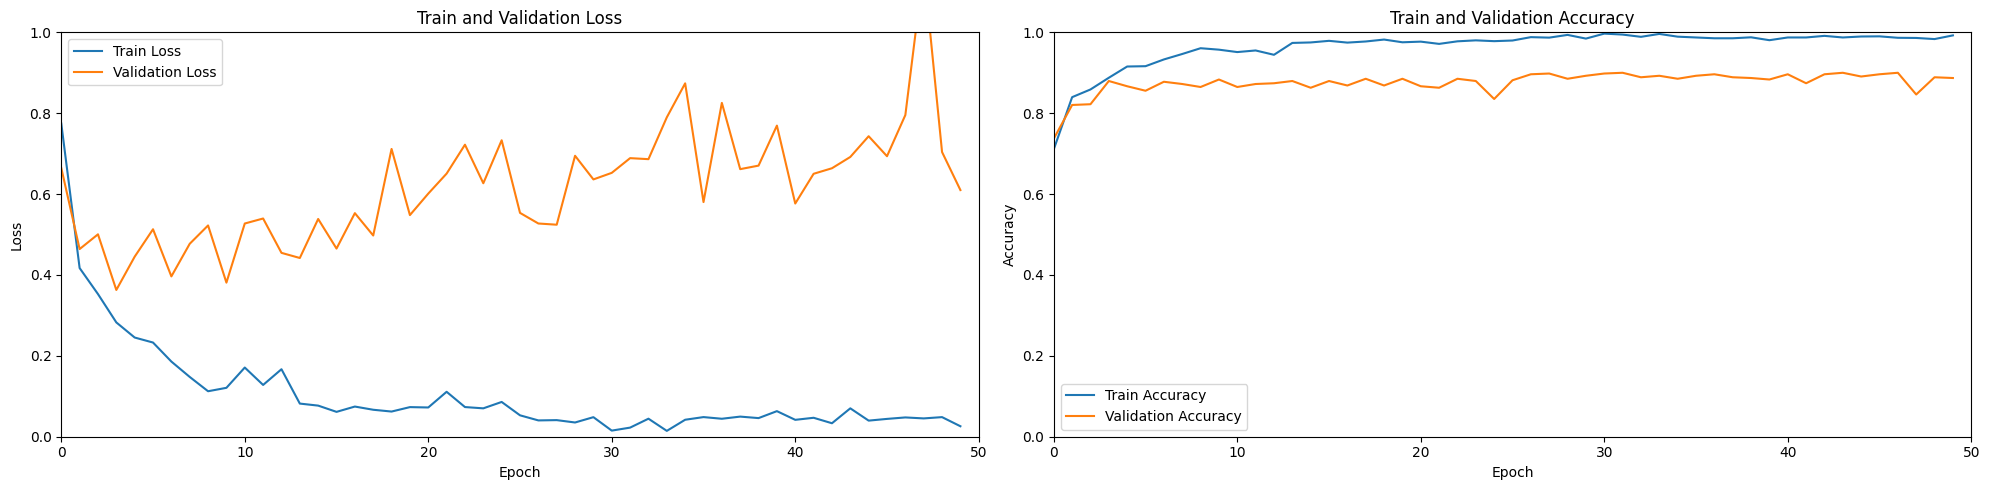

In [8]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history_1.history['loss'],label="Train Loss")
plt.plot(history_1.history['val_loss'], label="Validation Loss")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_1.history['accuracy'], label="Train Accuracy")
plt.plot(history_1.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint
base_model_2 = Xception(
    input_shape=(227, 227, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 

for layer in base_model_2.layers:
    layer.trainable = False

# Build model
inputs = base_model_2.input
x = BatchNormalization()(base_model_2.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(6, activation='softmax')(x)
model_2 = Model(inputs=inputs, outputs=outputs)

# Compile model
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Deal with class imbalances
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_image_generator.classes), y= train_image_generator.classes)
class_weight_dict = dict(enumerate(class_weights))
checkpoint_callback = ModelCheckpoint(
    'best_model_XC.keras',  
    save_best_only=True,      
    mode='min'                
)
history_2 = model_2.fit(
    train_image_generator,
    epochs=50,
    validation_data=test_image_generator,
    callbacks=[checkpoint_callback],
    class_weight=class_weight_dict
)
model_2.save('Leather_XC.keras')

Epoch 1/50


/home/abhiramd/programs/DL_TF/dl_tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725109147.843055    3564 service.cc:146] XLA service 0x763f28021bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725109147.843089    3564 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-08-31 18:29:08.022214: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-31 18:29:09.122604: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN ver

 2/79 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.1797 - loss: 2.0289 

I0000 00:00:1725109169.015487    3564 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/79 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4472 - loss: 1.4060

2024-08-31 18:29:33.120309: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4217', 32 bytes spill stores, 32 bytes spill loads

2024-08-31 18:29:33.190459: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4217', 12 bytes spill stores, 12 bytes spill loads

2024-08-31 18:29:33.516458: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4217', 200 bytes spill stores, 200 bytes spill loads

2024-08-31 18:29:34.121970: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4619', 24 bytes spill stores, 24 bytes spill loads

2024-08-31 18:29:35.311241: I external/local_xla/xla/strea

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.5857 - loss: 1.0699

2024-08-31 18:30:01.356058: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1068', 12 bytes spill stores, 12 bytes spill loads

2024-08-31 18:30:01.363701: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1068', 32 bytes spill stores, 32 bytes spill loads

2024-08-31 18:30:01.571844: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1068', 200 bytes spill stores, 200 bytes spill loads



79/79 ━━━━━━━━━━━━━━━━━━━━ 73s 601ms/step - accuracy: 0.5871 - loss: 1.0665 - val_accuracy: 0.6926 - val_loss: 0.8927
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.8398 - loss: 0.4244 - val_accuracy: 0.8556 - val_loss: 0.4309
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.8589 - loss: 0.3360 - val_accuracy: 0.8278 - val_loss: 0.4110
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.8904 - loss: 0.3023 - val_accuracy: 0.8648 - val_loss: 0.3451
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.8985 - loss: 0.2702 - val_accuracy: 0.8815 - val_loss: 0.3021
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.9221 - loss: 0.2099 - val_accuracy: 0.8685 - val_loss: 0.3301
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.9294 - loss: 0.1727 - val_accuracy: 0.8870 - val_loss: 0.3640
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.9274 - loss: 0.1992 - val_accuracy: 0.8963 

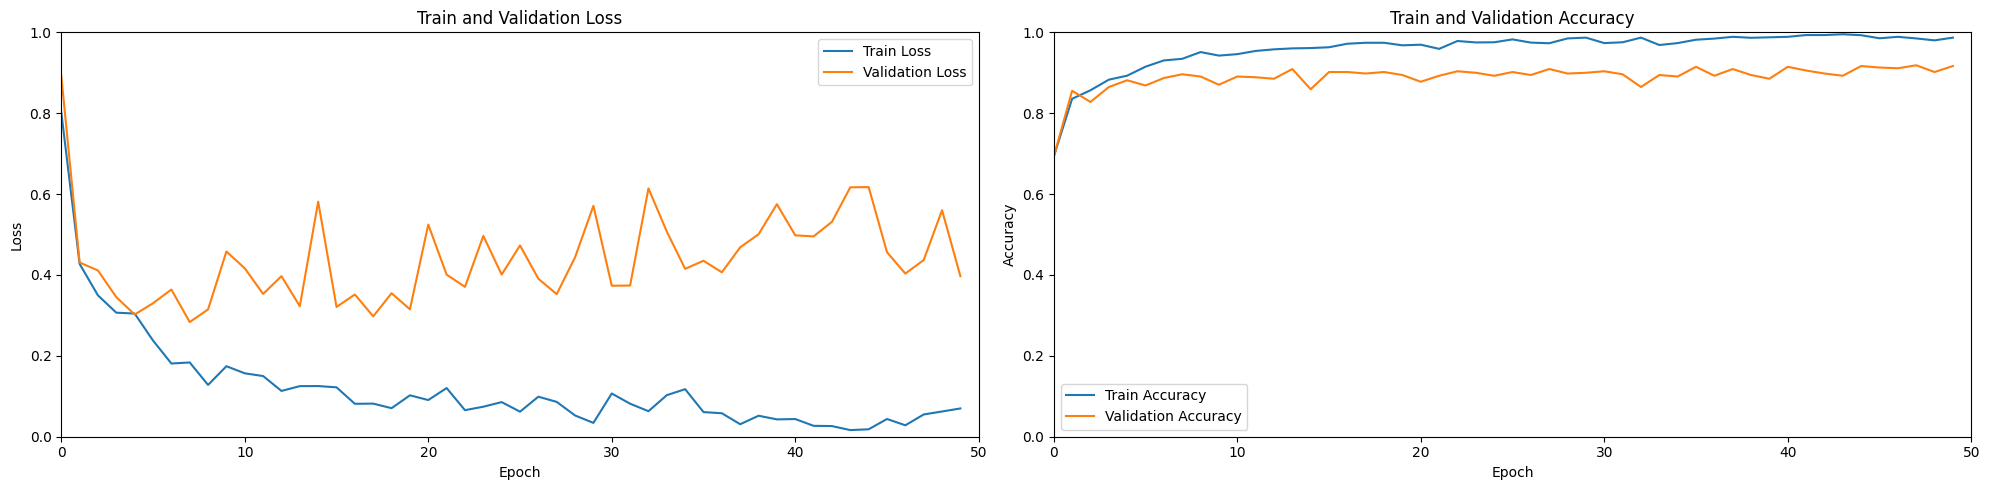

In [7]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history_2.history['loss'],label="Train Loss")
plt.plot(history_2.history['val_loss'], label="Validation Loss")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_2.history['accuracy'], label="Train Accuracy")
plt.plot(history_2.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [8]:
base_model_3 = EfficientNetV2S(
    input_shape=(227, 227, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 

for layer in base_model_3.layers:
    layer.trainable = False

# Build model
inputs = base_model_3.input
x = BatchNormalization()(base_model_3.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(6, activation='softmax')(x)
model_3 = Model(inputs=inputs, outputs=outputs)

# Compile model
model_3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Deal with class imbalances
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_image_generator.classes), y= train_image_generator.classes)
class_weight_dict = dict(enumerate(class_weights))
checkpoint_callback = ModelCheckpoint(
    'best_model_ENV2S.keras',  
    save_best_only=True,      
    mode='min'                
)
history_3 = model_3.fit(
    train_image_generator,
    epochs=50,
    validation_data=test_image_generator,
    callbacks=[checkpoint_callback],
    class_weight=class_weight_dict
)
model_3.save('Leather_ENV2S.keras')

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 67s 495ms/step - accuracy: 0.1833 - loss: 2.0593 - val_accuracy: 0.1667 - val_loss: 2.7207
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.1605 - loss: 1.8348 - val_accuracy: 0.1667 - val_loss: 1.8767
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.1612 - loss: 1.8151 - val_accuracy: 0.1667 - val_loss: 1.8431
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.1653 - loss: 1.8168 - val_accuracy: 0.1685 - val_loss: 1.7911
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.1496 - loss: 1.8073 - val_accuracy: 0.1574 - val_loss: 1.7919
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.1701 - loss: 1.8029 - val_accuracy: 0.1685 - val_loss: 1.7924
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.1764 - loss: 1.7950 - val_accuracy: 0.1778 - val_loss: 1.7910
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accur

In [9]:
base_model_4 = VGG19(
    input_shape=(227, 227, 3), 
    include_top=False,             
    weights='imagenet',
    pooling='max'
) 

for layer in base_model_4.layers:
    layer.trainable = False

# Build model
inputs = base_model_4.input
x = BatchNormalization()(base_model_4.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(6, activation='softmax')(x)
model_4 = Model(inputs=inputs, outputs=outputs)

# Compile model
model_4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Deal with class imbalances
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_image_generator.classes), y= train_image_generator.classes)
class_weight_dict = dict(enumerate(class_weights))
checkpoint_callback = ModelCheckpoint(
    'best_model_VGG19.keras',  
    save_best_only=True,      
    mode='min'                
)
history_4 = model_4.fit(
    train_image_generator,
    epochs=50,
    validation_data=test_image_generator,
    callbacks=[checkpoint_callback],
    class_weight=class_weight_dict
)
model_4.save('Leather_VGG19.keras')

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 443ms/step - accuracy: 0.5457 - loss: 1.0755 - val_accuracy: 0.2611 - val_loss: 1.6794
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.7540 - loss: 0.5775 - val_accuracy: 0.4444 - val_loss: 1.4287
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.7907 - loss: 0.4795 - val_accuracy: 0.6444 - val_loss: 0.9548
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.8233 - loss: 0.4290 - val_accuracy: 0.7889 - val_loss: 0.7120
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.8343 - loss: 0.4160 - val_accuracy: 0.8000 - val_loss: 0.5405
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.8490 - loss: 0.3784 - val_accuracy: 0.7963 - val_loss: 0.5239
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.8440 - loss: 0.3698 - val_accuracy: 0.7963 - val_loss: 0.5456
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 128m

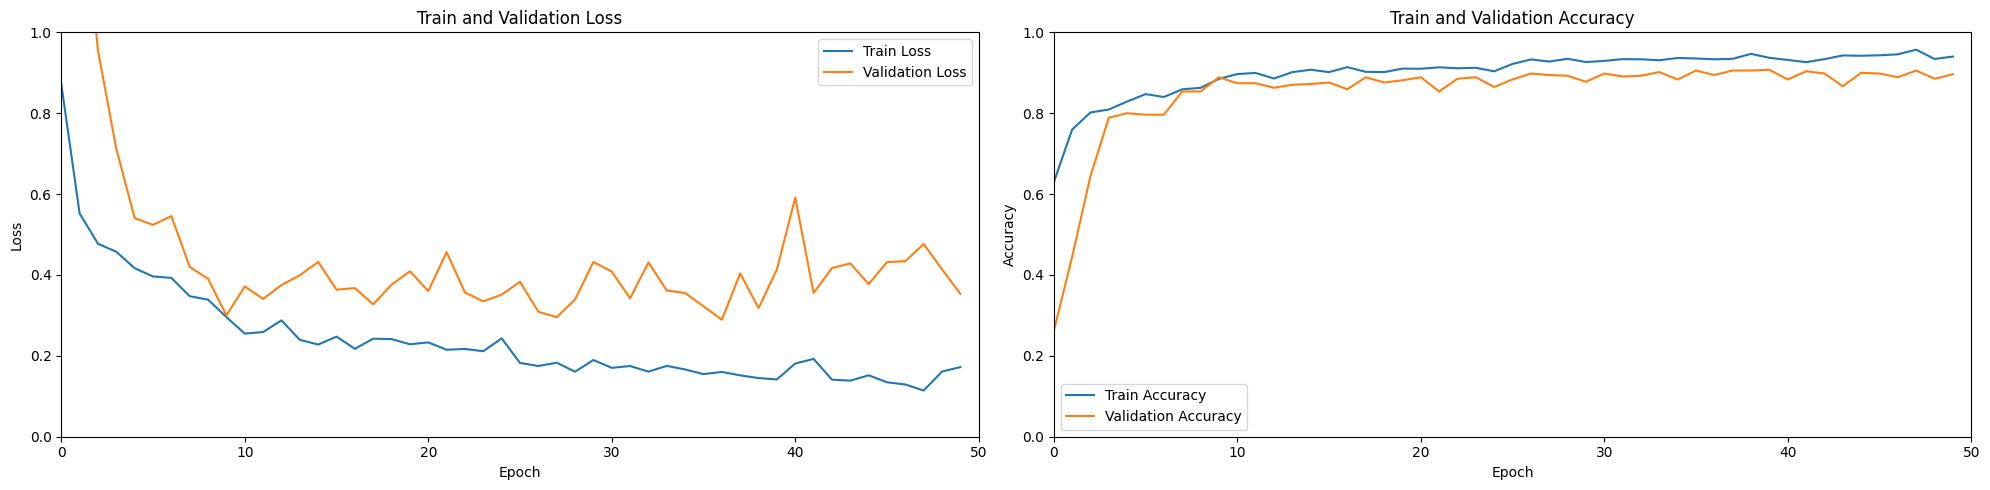

In [10]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history_4.history['loss'],label="Train Loss")
plt.plot(history_4.history['val_loss'], label="Validation Loss")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history_4.history['accuracy'], label="Train Accuracy")
plt.plot(history_4.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 50)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [19]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import tensorflow as tf
import numpy as np
import itertools
from scipy import stats

# Paths and parameters
test_path = 'test'
img_size = (227, 227)  # Example image size, replace with your model's input size
batch_size = 32 # Example batch size, replace as necessary

# Function to normalize images
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image to [0,1]
    return image, label

# Load test dataset with normalization
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    seed=42
).map(preprocess_image)  # Apply hh using map function

# List of your models
model_paths = ['best_model_VGG19.keras', 'Leather_IV3.keras', 'best_model_XC.keras']  # Replace with your actual file paths
models = [tf.keras.models.load_model(model_path) for model_path in model_paths]

# Initialize lists to collect true labels and predictions
labels = []
ensemble_predictions = []

# Loop over the test dataset
for x, y in test_dataset:
    labels.append(list(y.numpy().astype("uint8")))
    
    # Collect predictions from all models
    batch_predictions = []
    for model in models:
        preds = model.predict(x)
        batch_predictions.append(np.argmax(preds, axis=1))
    
    # Stack predictions and perform majority voting
    batch_predictions = np.array(batch_predictions)  # Shape (num_models, batch_size)
    ensemble_pred_classes = stats.mode(batch_predictions, axis=0)[0].flatten()
    ensemble_predictions.append(ensemble_pred_classes)

# Flatten lists of labels and predictions
predictions = list(itertools.chain.from_iterable(ensemble_predictions))
labels = list(itertools.chain.from_iterable(labels))

# Calculate and print metrics
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))
print("F1 score        : {:.2f}".format(f1_score(labels, predictions, average='micro')))

# Optional: Confusion matrix
conf_matrix = confusion_matrix(labels, predictions)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_report(labels, predictions))

Found 540 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━

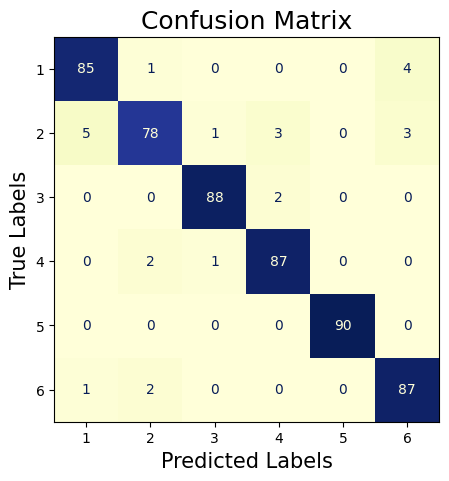

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, predictions)

class_accuracy = cm.diagonal() / cm.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1, 7)))
disp.plot(ax=ax, colorbar=False, cmap='YlGnBu')

# Set font sizes for labels and title
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel('Predicted Labels', fontsize=15)
plt.ylabel('True Labels', fontsize=15)

plt.show()

In [16]:
def get_results(model):
    labels = []
    predictions = []
    for x,y in test_dataset:
        labels.append(list(y.numpy().astype("uint8")))
        predictions.append(tf.argmax(model.predict(x),1).numpy().astype("uint8"))
    import itertools
    predictions = list(itertools.chain.from_iterable(predictions))
    labels = list(itertools.chain.from_iterable(labels))
    print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
    print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
    print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))
    print('F1 score:', f1_score(labels, predictions, average='micro'))
    cm = confusion_matrix(labels, predictions)

    class_accuracy = cm.diagonal() / cm.sum(axis=1)

    fig, ax = plt.subplots(figsize=(5, 5))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1, 7)))
    disp.plot(ax=ax, colorbar=False, cmap='YlGnBu')

    # Set font sizes for labels and title
    plt.title("Confusion Matrix", fontsize=18)
    plt.xlabel('Predicted Labels', fontsize=15)
    plt.ylabel('True Labels', fontsize=15)

    plt.show()

<Functional name=functional_3, built=True>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Test Accuracy   : 91.48 %
Precision Score : 91.48 %
Recall Score    : 91.48 %
F1 score: 0.9148148148148149


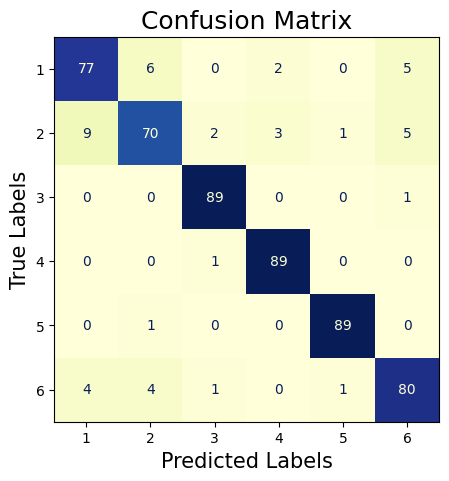

<Functional name=functional_1, built=True>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Test Accuracy   : 88.15 %
Precision Score : 88.15 %
Recall Score    : 88.15 %
F1 score: 0.8814814814814815


2024-08-31 19:20:15.989270: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


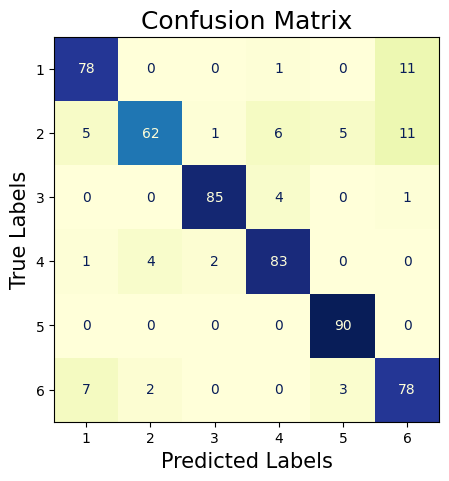

<Functional name=functional_1, built=True>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test Accuracy   : 89.63 %
Precision Score : 89.63 %
Recall Score    : 89.63 %
F1 score: 0.8962962962962963


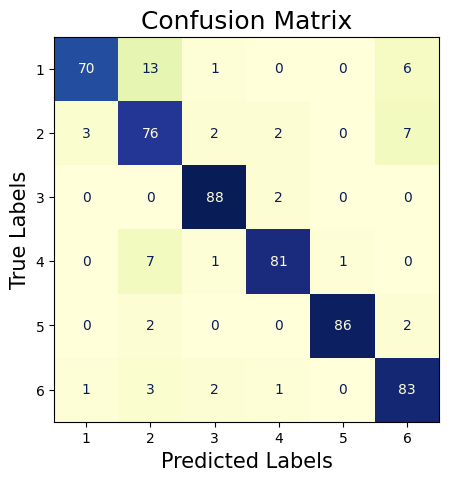

In [17]:
for model in models:
    print(model)
    get_results(model)